In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

In [ ]:
# Set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [ ]:
# Load stocks data for Microsoft and Apple
stocks_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2025/course-datasets/main/stock_data.csv', index_col='Date', parse_dates=True) # Significant to have index as date
stocks_df = stocks_df[(stocks_df['company_name'] == 'MICROSOFT') | (stocks_df['company_name'] == 'APPLE')]

# Keep only the columns we need (company_name, Adj Close)
stocks_df = stocks_df[['company_name', 'Adj Close']]
stocks_df

,company_name,Adj Close
Date,,
2019-02-19,APPLE,41.138523
2019-02-20,APPLE,41.403271
2019-02-21,APPLE,41.169807
2019-02-22,APPLE,41.629509
2019-02-25,APPLE,41.932755
...,...,...
2024-02-12,MICROSOFT,414.493500
2024-02-13,MICROSOFT,405.570007
2024-02-14,MICROSOFT,409.489990


In [ ]:
# Separate dataframe for Microsoft stocks
microsoft_df = stocks_df[stocks_df['company_name'] == 'MICROSOFT']
microsoft_df = microsoft_df.drop(columns=['company_name']) # Drop the company_name column
microsoft_df.head()

,Adj Close
Date,
2019-02-19,102.528320
2019-02-20,101.995255
2019-02-21,104.146538
2019-02-22,105.631493
2019-02-25,106.221664


In [ ]:
# Separate dataframe for Apple stocks
apple_df = stocks_df[stocks_df['company_name'] == 'APPLE']
apple_df = apple_df.drop(columns=['company_name']) # Drop the company_name column
apple_df.head()

,Adj Close
Date,
2019-02-19,41.138523
2019-02-20,41.403271
2019-02-21,41.169807
2019-02-22,41.629509
2019-02-25,41.932755


In [ ]:
# Load temperature data
temperature_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2025/course-datasets/main/cities_temperature.csv')
temperature_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Australia/South Pacific,Australia,NaN,Sydney,1,1,1995,59.1
1,Australia/South Pacific,Australia,NaN,Sydney,1,2,1995,64.6
2,Australia/South Pacific,Australia,NaN,Sydney,1,3,1995,79.1
3,Australia/South Pacific,Australia,NaN,Sydney,1,4,1995,77.3
4,Australia/South Pacific,Australia,NaN,Sydney,1,5,1995,70.2


In [ ]:
# Cities of interest
city_1 = "Calgary"
city_2 = "Buenos Aires"
city_3 = "Edmonton"

# Extract data for cities
city_1_df = temperature_df[temperature_df['City'] == city_1].copy() # Use copy to avoid SettingWithCopyWarning
city_2_df = temperature_df[temperature_df['City'] == city_2].copy()
city_3_df = temperature_df[temperature_df['City'] == city_3].copy()

city_1_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
9266,North America,Canada,NaN,Calgary,1,1,1995,12.6
9267,North America,Canada,NaN,Calgary,1,2,1995,4.5
9268,North America,Canada,NaN,Calgary,1,3,1995,2.5
9269,North America,Canada,NaN,Calgary,1,4,1995,11.4
9270,North America,Canada,NaN,Calgary,1,5,1995,11.3


In [ ]:
# Create new Date column by aggregating Month, Day, and Year columns to MM/DD/YYYY format, then convert to DateTimeIndex

city_1_df['Date'] = pd.to_datetime(city_1_df['Month'].astype(str) + '/' + city_1_df['Day'].astype(str) + '/' + city_1_df['Year'].astype(str))
city_1_df = city_1_df.set_index('Date')

city_2_df['Date'] = pd.to_datetime(city_2_df['Month'].astype(str) + '/' + city_2_df['Day'].astype(str) + '/' + city_2_df['Year'].astype(str))
city_2_df = city_2_df.set_index('Date')

city_3_df['Date'] = pd.to_datetime(city_3_df['Month'].astype(str) + '/' + city_3_df['Day'].astype(str) + '/' + city_3_df['Year'].astype(str))
city_3_df = city_3_df.set_index('Date')

city_1_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
Date,,,,,,,,
1995-01-01,North America,Canada,NaN,Calgary,1,1,1995,12.6
1995-01-02,North America,Canada,NaN,Calgary,1,2,1995,4.5
1995-01-03,North America,Canada,NaN,Calgary,1,3,1995,2.5
1995-01-04,North America,Canada,NaN,Calgary,1,4,1995,11.4
1995-01-05,North America,Canada,NaN,Calgary,1,5,1995,11.3


In [ ]:
# Keep only the columns we need
city_1_df = city_1_df[['AvgTemperature']]
city_2_df = city_2_df[['AvgTemperature']]
city_3_df = city_3_df[['AvgTemperature']]

city_1_df.head()

,AvgTemperature
Date,
1995-01-01,12.6
1995-01-02,4.5
1995-01-03,2.5
1995-01-04,11.4
1995-01-05,11.3


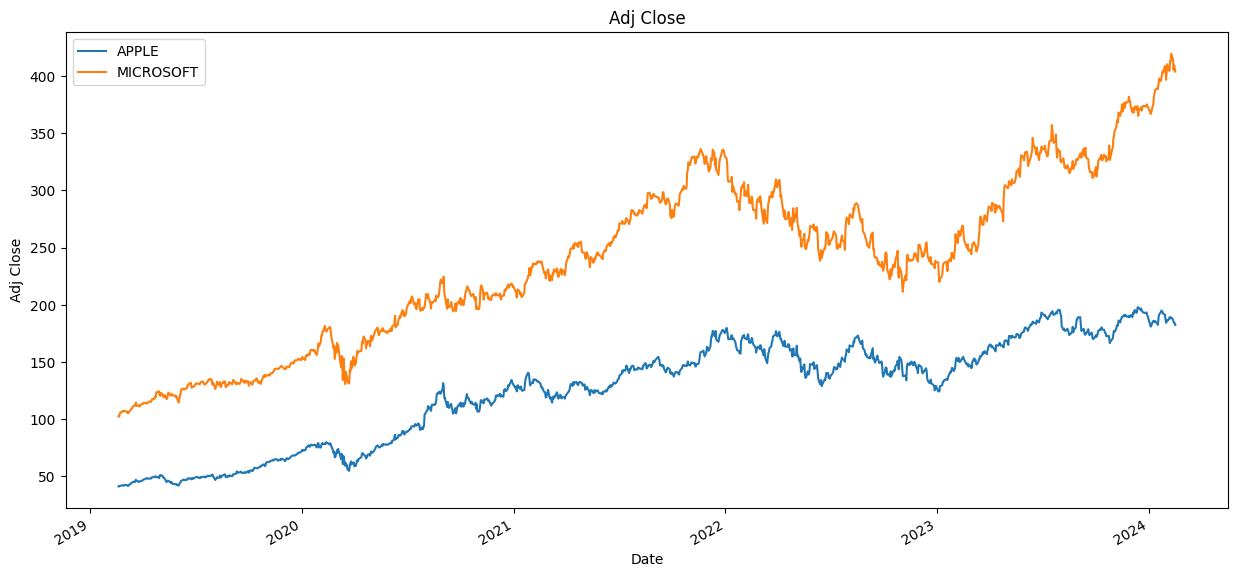

In [ ]:
# Plot the time series of Microsoft and Apple stock prices on the same plot

fig, ax = plt.subplots()

for name, company_data in stocks_df.groupby('company_name'):
  company_data.plot(ax = ax, y = 'Adj Close', label = name, title = f"{'Adj Close'}", xlabel = "Date", ylabel = 'Adj Close', figsize = (15, 7))

**Enter answer here:** There is an overall upward trend. Apple stocks are consistently higher than Microsoft stocks.

In [ ]:
# Downsample Microsoft stock data to weekly, monthly, quarterly, semi-annually and annually frequency

microsoft_df_weekly = microsoft_df.resample('W').mean()
microsoft_df_monthly = microsoft_df.resample('ME').mean()
microsoft_df_quaterly = microsoft_df.resample('QE').mean()
microsoft_df_semi_anually = microsoft_df.resample('6ME').mean()
microsoft_df_anually = microsoft_df.resample('YE').mean()

<Axes: title={'center': 'Microsoft Adj Close'}, xlabel='Date', ylabel='Adj Close'>

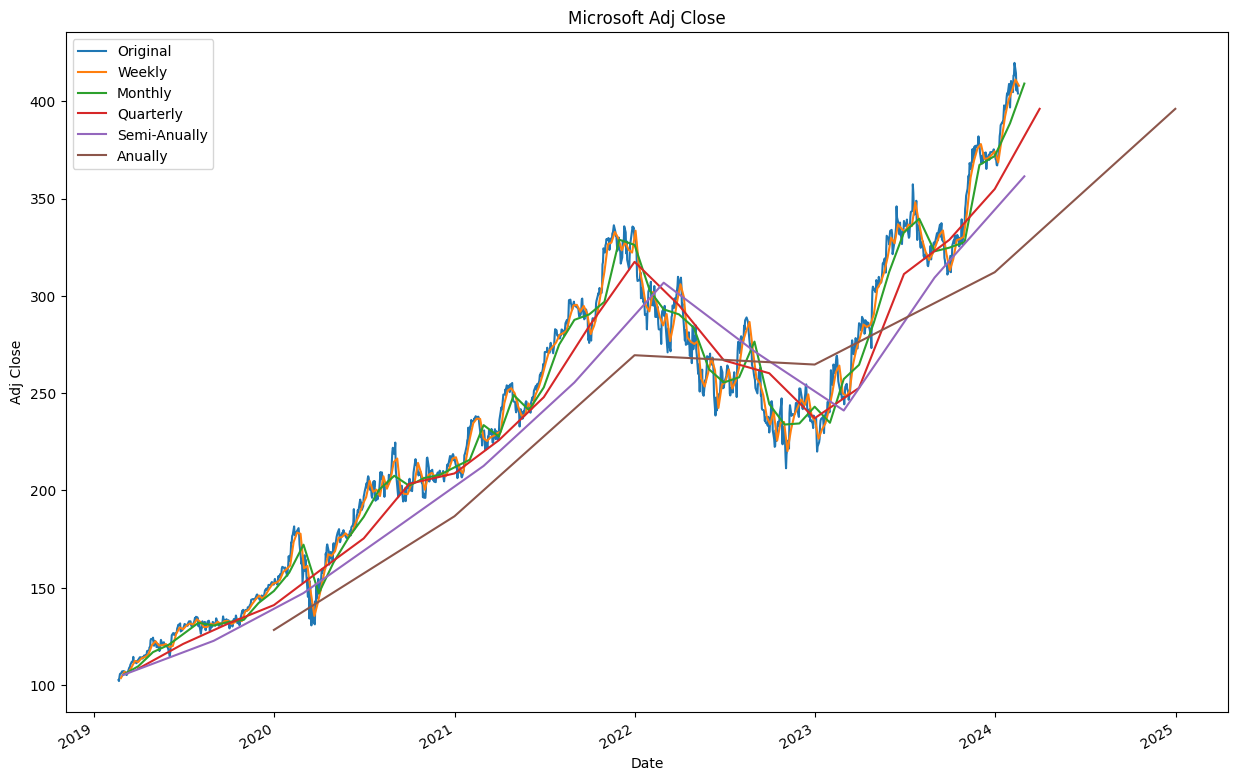

In [ ]:
# Plot the daily, weekly, monthly, quarterly, semi-annually and annually stock prices for Microsoft on the same plot (use figsize=(15, 10))

fig, ax = plt.subplots(1, 1, figsize=(15,10))

microsoft_df.plot(ax = ax, y = 'Adj Close', label = 'Original', title = 'Microsoft Adj Close', xlabel = "Date", ylabel = 'Adj Close')
microsoft_df_weekly.plot(ax = ax, y='Adj Close', label='Weekly', xlabel="Date", ylabel="Adj Close")
microsoft_df_monthly.plot(ax = ax, y='Adj Close', label='Monthly', xlabel="Date", ylabel="Adj Close")
microsoft_df_quaterly.plot(ax = ax, y='Adj Close', label='Quarterly', xlabel="Date", ylabel="Adj Close")
microsoft_df_semi_anually.plot(ax = ax, y='Adj Close', label='Semi-Anually', xlabel="Date", ylabel="Adj Close")
microsoft_df_anually.plot(ax = ax, y='Adj Close', label='Anually', xlabel="Date", ylabel="Adj Close")

In [ ]:
# Downsample Apple stock data to weekly, monthly, quarterly, semi-annually and annually frequency

apple_df_weekly = apple_df.resample('W').mean()
apple_df_monthly = apple_df.resample('ME').mean()
apple_df_quaterly = apple_df.resample('QE').mean()
apple_df_semi_anually = apple_df.resample('6ME').mean()
apple_df_anually = apple_df.resample('YE').mean()

<Axes: title={'center': 'Apple Adj Close'}, xlabel='Date', ylabel='Adj Close'>

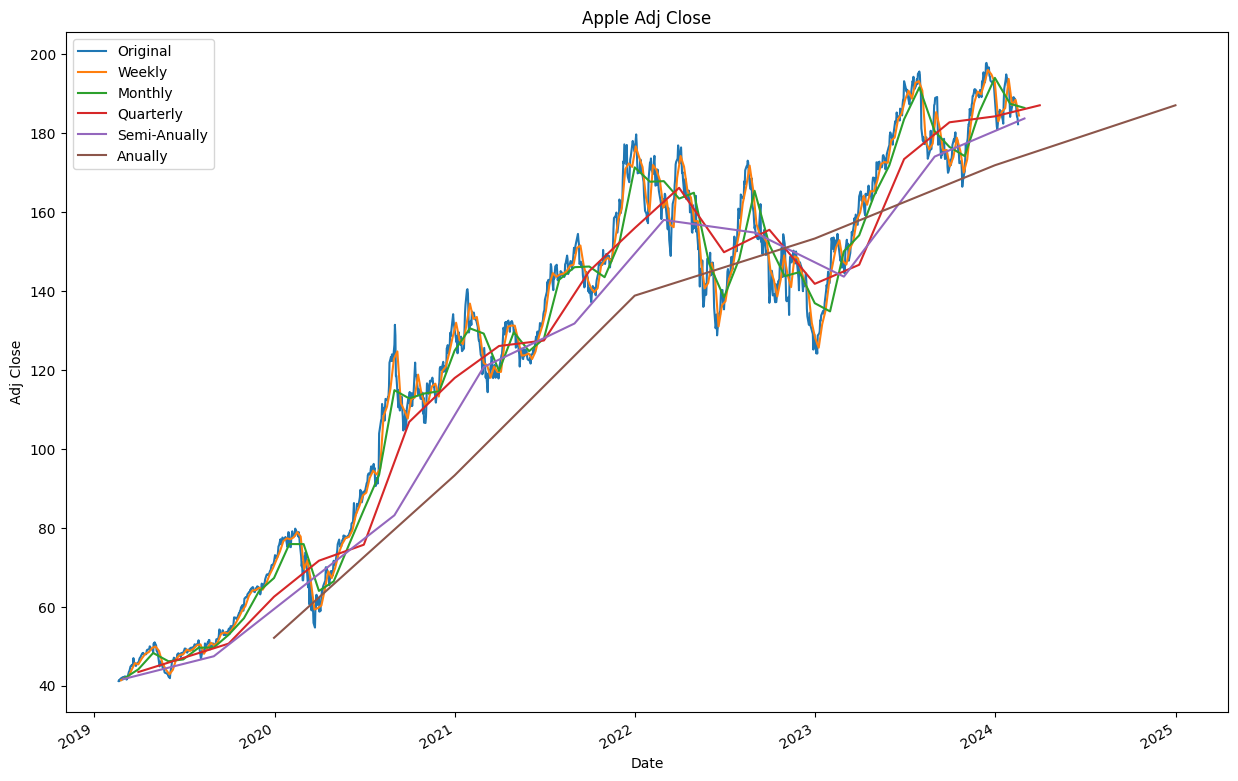

In [ ]:
# Plot the daily, weekly, monthly, quarterly, semi-annually and annually stock prices for Apple on the same plot (use figsize=(15, 10))

fig, ax = plt.subplots(1, 1, figsize=(15,10))

apple_df.plot(ax = ax, y = 'Adj Close', label = 'Original', title = 'Apple Adj Close', xlabel = "Date", ylabel = 'Adj Close')
apple_df_weekly.plot(ax = ax, y='Adj Close', label='Weekly', xlabel="Date", ylabel="Adj Close")
apple_df_monthly.plot(ax = ax, y='Adj Close', label='Monthly', xlabel="Date", ylabel="Adj Close")
apple_df_quaterly.plot(ax = ax, y='Adj Close', label='Quarterly', xlabel="Date", ylabel="Adj Close")
apple_df_semi_anually.plot(ax = ax, y='Adj Close', label='Semi-Anually', xlabel="Date", ylabel="Adj Close")
apple_df_anually.plot(ax = ax, y='Adj Close', label='Anually', xlabel="Date", ylabel="Adj Close")

In [ ]:
# Add a column to the monthly downsampled Microsoft dataframe (from Q1) called 'monthly_return'
# This column will contain the monthly return of the stock (use the pct_change() method)
# Then display the first 5 rows of the dataframe

microsoft_df_monthly['monthly_return'] = microsoft_df_monthly['Adj Close'].pct_change()
microsoft_df_montly.head()

,Adj Close,montly_return
Date,,
2019-02-28,105.111517,NaN
2019-03-31,109.594991,0.042654
2019-04-30,116.887392,0.066540
2019-05-31,120.511057,0.031001
2019-06-30,126.109168,0.046453


In [ ]:
# Do the same for the monthly downsampled Apple dataframe

apple_df_monthly['monthly_return'] = apple_df_monthly['Adj Close'].pct_change()
apple_df_monthly.head()

,Adj Close,monthly_return
Date,,
2019-02-28,41.623787,NaN
2019-03-31,44.114187,0.059831
2019-04-30,48.259177,0.093960
2019-05-31,46.151073,-0.043683
2019-06-30,46.621609,0.010196


<Axes: title={'center': 'Microsoft vs Apple Monthly Return'}, xlabel='Date', ylabel='Monthly Return'>

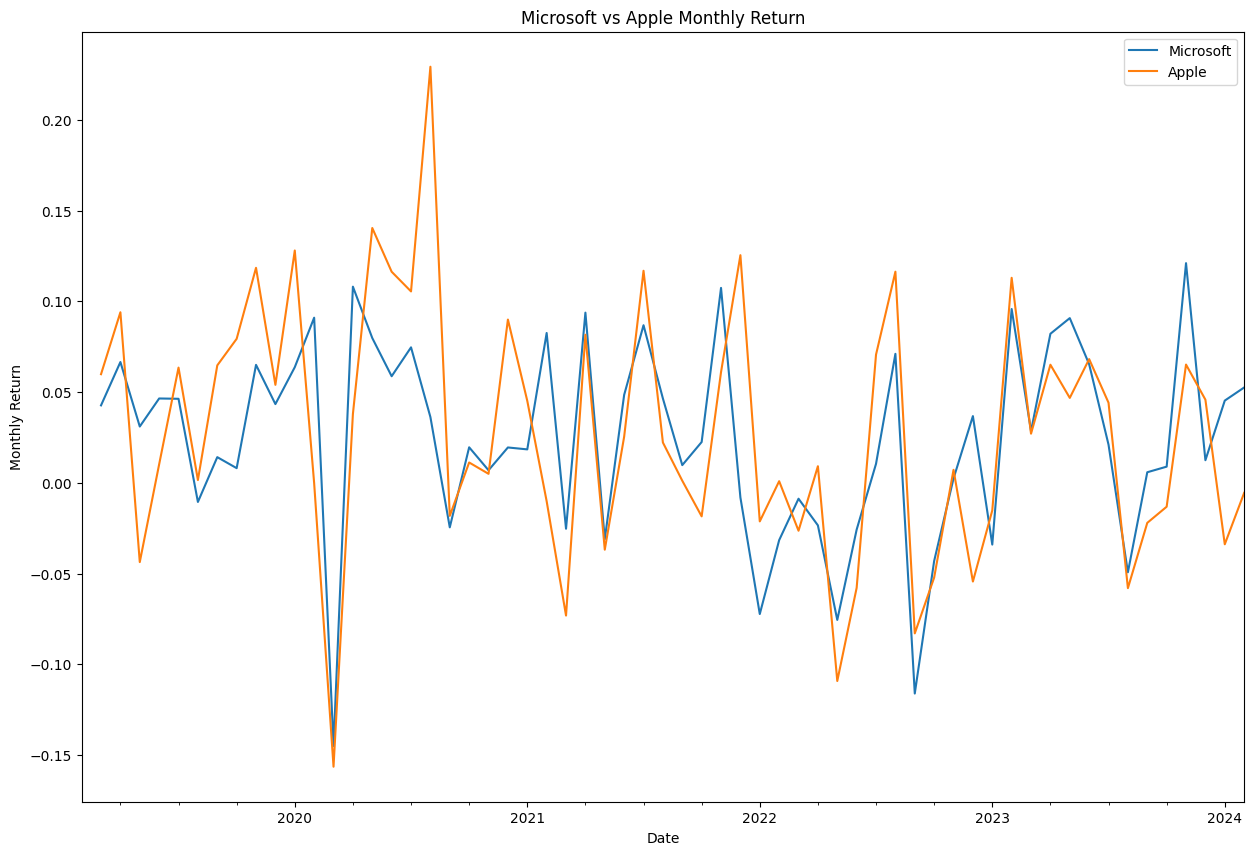

In [ ]:
# Plot the monthly return of Microsoft and Apple stocks on the same plot

fig, ax = plt.subplots(1, 1, figsize=(15,10))
microsoft_df_monthly.plot(ax = ax, y = 'monthly_return', label = 'Microsoft', title = 'Microsoft vs Apple Monthly Return', xlabel = "Date", ylabel = 'Monthly Return')
apple_df_monthly.plot(ax = ax, y = 'monthly_return', label = 'Apple', title = 'Microsoft vs Apple Monthly Return', xlabel = "Date", ylabel = 'Monthly Return')

**Enter answer here:** The plot Q1(a) shows the adjusted closed prices of both Microsoft and Apple over time. It reveals an upward trend with certain periods that act unexpectedly, either shooting up or down. The plot in Q2 shows the montly returns both stocks. It shows fluctuations without any pattern. Therefore, although stocks may have an overall upward trend, it doesn't have any effect on the monthly return.

In [ ]:
# Smooth the monthly stock prices of Microsoft using exponential smoothing with alpha = 0.2, 0.4, 0.6, 0.8

microsoft_df_monthly_exp_02 = microsoft_df_monthly.ewm(alpha = 0.2, adjust = False).mean()
microsoft_df_monthly_exp_04 = microsoft_df_monthly.ewm(alpha = 0.4, adjust = False).mean()
microsoft_df_monthly_exp_06 = microsoft_df_monthly.ewm(alpha = 0.6, adjust = False).mean()
microsoft_df_monthly_exp_08 = microsoft_df_monthly.ewm(alpha = 0.8, adjust = False).mean()

<Axes: title={'center': 'Microsoft Exp. Smoothed Prices'}, xlabel='Date', ylabel='Adj Close'>

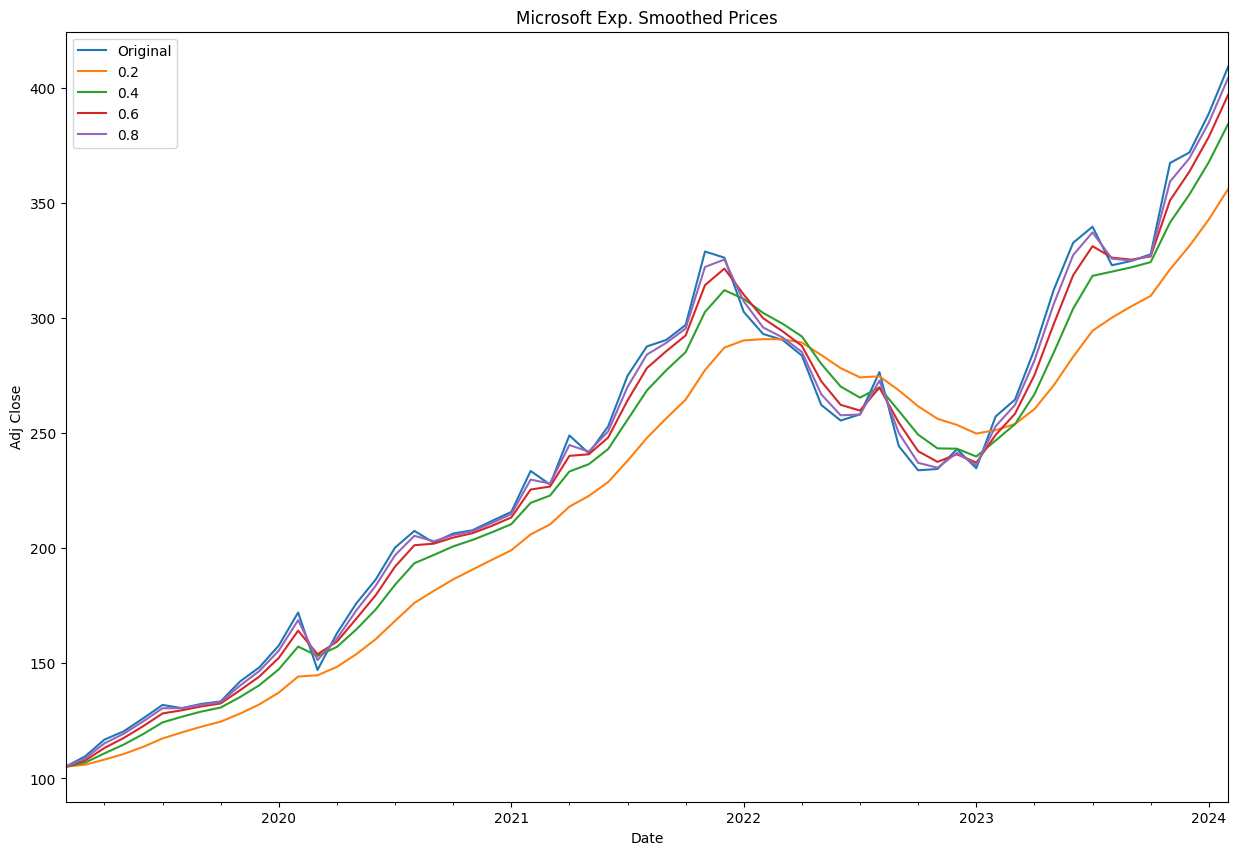

In [ ]:
# Plot the monthly and smoothed monthly stock prices of Microsoft on the same plot (5 lines)

fig, ax = plt.subplots(1, 1, figsize=(15,10))
microsoft_df_monthly.plot(ax = ax, y = 'Adj Close', label = 'Original', title = 'Microsoft Exp. Smoothed Prices', xlabel = "Date", ylabel = 'Adj Close')
microsoft_df_monthly_exp_02.plot(ax = ax, y = 'Adj Close', label = '0.2', title = 'Microsoft Exp. Smoothed Prices', xlabel = "Date", ylabel = 'Adj Close')
microsoft_df_monthly_exp_04.plot(ax = ax, y = 'Adj Close', label = '0.4', title = 'Microsoft Exp. Smoothed Prices', xlabel = "Date", ylabel = 'Adj Close')
microsoft_df_monthly_exp_06.plot(ax = ax, y = 'Adj Close', label = '0.6', title = 'Microsoft Exp. Smoothed Prices', xlabel = "Date", ylabel = 'Adj Close')
microsoft_df_monthly_exp_08.plot(ax = ax, y = 'Adj Close', label = '0.8', title = 'Microsoft Exp. Smoothed Prices', xlabel = "Date", ylabel = 'Adj Close')

In [ ]:
# Smooth the monthly stock prices of Apple using exponential smoothing with alpha = 0.2, 0.4, 0.6, 0.8

apple_df_monthly_exp_02 = apple_df_monthly.ewm(alpha = 0.2, adjust = False).mean()
apple_df_monthly_exp_04 = apple_df_monthly.ewm(alpha = 0.4, adjust = False).mean()
apple_df_monthly_exp_06 = apple_df_monthly.ewm(alpha = 0.6, adjust = False).mean()
apple_df_monthly_exp_08 = apple_df_monthly.ewm(alpha = 0.8, adjust = False).mean()

<Axes: title={'center': 'Apple Exp. Smoothed Prices'}, xlabel='Date', ylabel='Adj Close'>

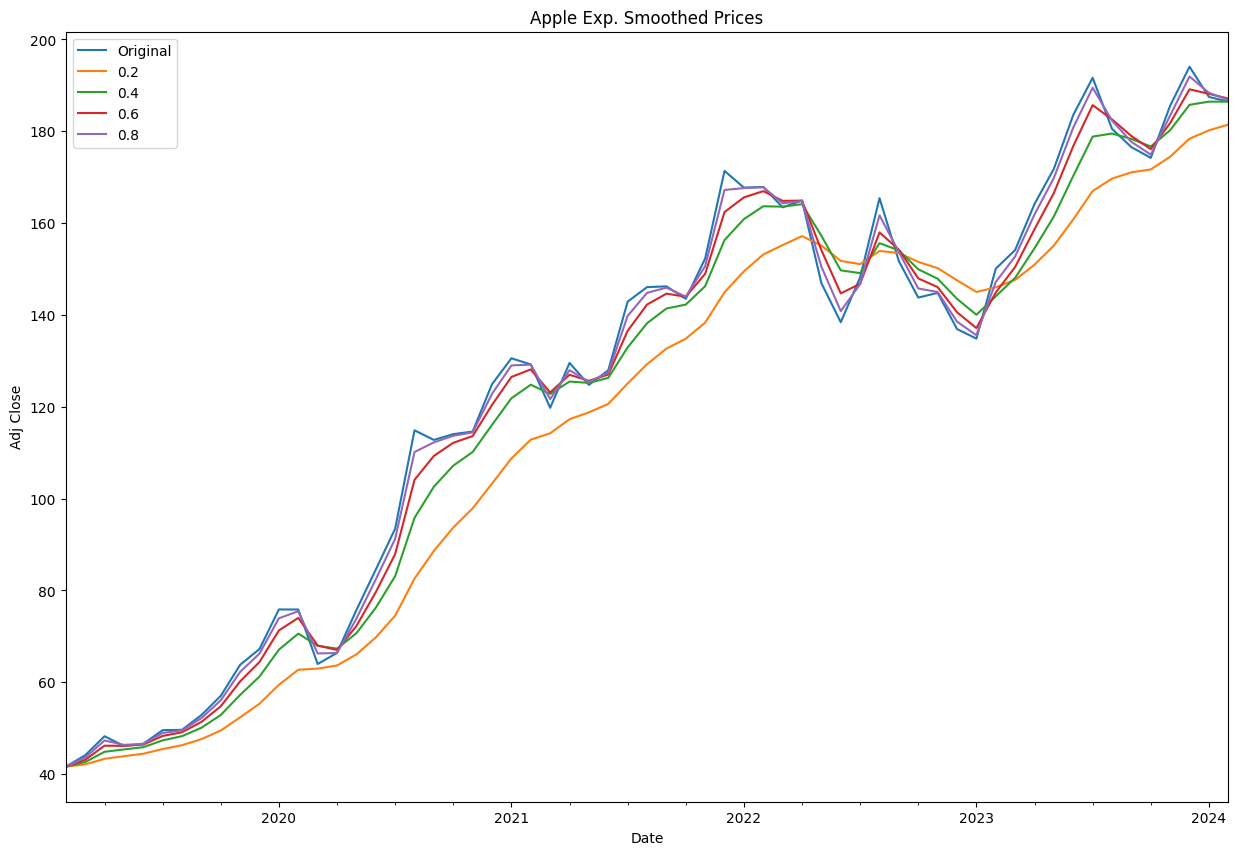

In [ ]:
# Plot the monthly and smoothed monthly stock prices of Apple on the same plot (5 lines)

fig, ax = plt.subplots(1, 1, figsize=(15,10))
apple_df_monthly.plot(ax = ax, y = 'Adj Close', label = 'Original', title = 'Apple Exp. Smoothed Prices', xlabel = "Date", ylabel = 'Adj Close')
apple_df_monthly_exp_02.plot(ax = ax, y = 'Adj Close', label = '0.2', title = 'Apple Exp. Smoothed Prices', xlabel = "Date", ylabel = 'Adj Close')
apple_df_monthly_exp_04.plot(ax = ax, y = 'Adj Close', label = '0.4', title = 'Apple Exp. Smoothed Prices', xlabel = "Date", ylabel = 'Adj Close')
apple_df_monthly_exp_06.plot(ax = ax, y = 'Adj Close', label = '0.6', title = 'Apple Exp. Smoothed Prices', xlabel = "Date", ylabel = 'Adj Close')
apple_df_monthly_exp_08.plot(ax = ax, y = 'Adj Close', label = '0.8', title = 'Apple Exp. Smoothed Prices', xlabel = "Date", ylabel = 'Adj Close')

**Enter answer here:** Lower values of alpha have more smoothing and less noise. Also has less accuracy at a granular level. Higher values of alpha have more noise and less smoothing, but is more accurate at a granular level.

<Axes: title={'center': 'Edmonton Temperature'}, xlabel='Date', ylabel='Temperature'>

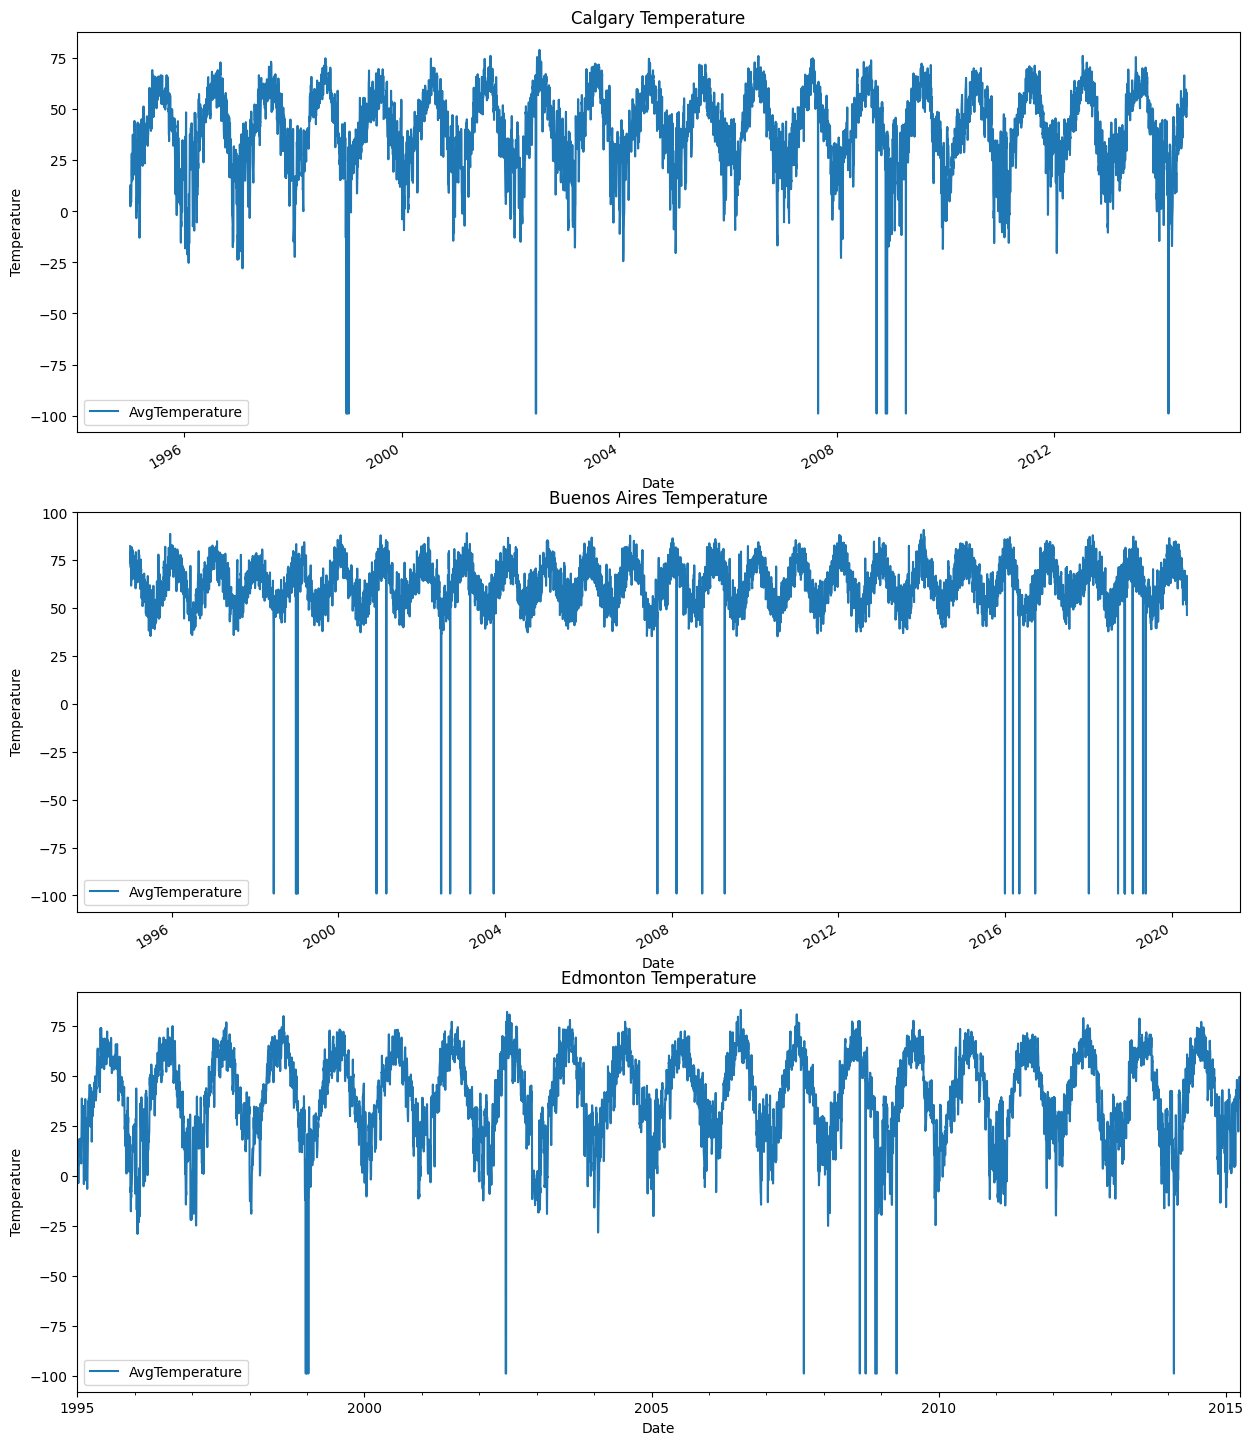

In [ ]:
# Plot temperature data for each city in different subplots

fig, ax = plt.subplots(3, 1, figsize = (15,20))

city_1_df.plot(ax=ax[0], title=f"{city_1} Temperature", xlabel="Date", ylabel="Temperature")
city_2_df.plot(ax=ax[1], title=f"{city_2} Temperature", xlabel="Date", ylabel="Temperature")
city_3_df.plot(ax=ax[2], title=f"{city_3} Temperature", xlabel="Date", ylabel="Temperature")

**Enter answer here:** (1) There are very low temperatures at seemingly random times. (2) a lot of noise, not smoothed.

In [ ]:
# Remove entries that aren't in intersection of all three indices (which are dates)

index_intersection = city_1_df.index.intersection(city_2_df.index).intersection(city_3_df.index)
city_1_df = city_1_df.loc[index_intersection]
city_2_df = city_2_df.loc[index_intersection]
city_3_df = city_3_df.loc[index_intersection]

In [ ]:
# Downsample the data to monthly

city_1_monthly = city_1_df.resample('ME').mean()
city_2_monthly = city_2_df.resample('ME').mean()
city_3_monthly = city_3_df.resample('ME').mean()

In [ ]:
# Apply exponential smoothing to temperature data with alpha = 0.3

city_1_monthly = city_1_monthly.ewm(alpha=0.3, adjust=False).mean()
city_2_monthly = city_2_monthly.ewm(alpha=0.3, adjust=False).mean()
city_3_monthly = city_3_monthly.ewm(alpha=0.3, adjust=False).mean()

<Axes: title={'center': 'Edmonton Monthly Temperature'}, xlabel='Date', ylabel='AvgTemperature'>

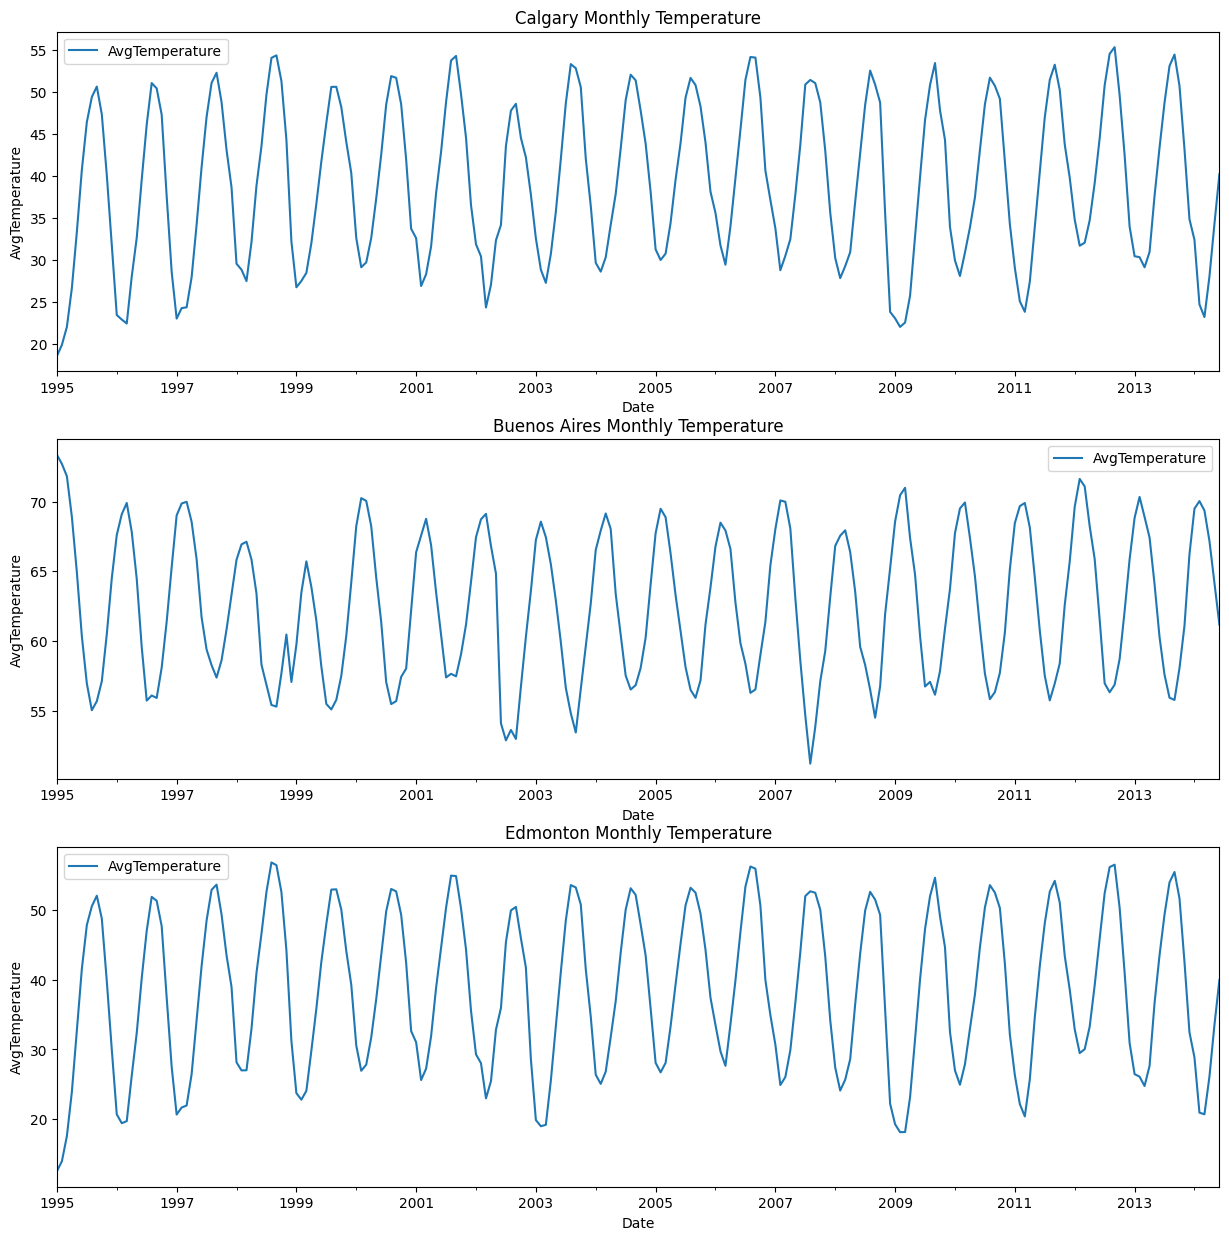

In [ ]:
# Plot monthly smoothed temperature data for cities in different subplots

fig, ax = plt.subplots(3, 1, figsize=(15,15))
city_1_monthly.plot(ax=ax[0], y='AvgTemperature', title=f"{city_1} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")
city_2_monthly.plot(ax=ax[1], y='AvgTemperature', title=f"{city_2} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")
city_3_monthly.plot(ax=ax[2], y='AvgTemperature', title=f"{city_3} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")

**Enter answer here:** (1)The plots are periodic. Buenos Aires has the opposite peak when compared to Edmonton or Calgary. When Edmonton or Calgary are at a minimum, Buenos Aires is at a maximum. When Edmonton and Calgary are at a maximum, Buenos Aires is at a minimum (2) Edmonton and Calagry should be closest to eachother since there are located roughly in the same area

Text(0, 0.5, 'Correlation')

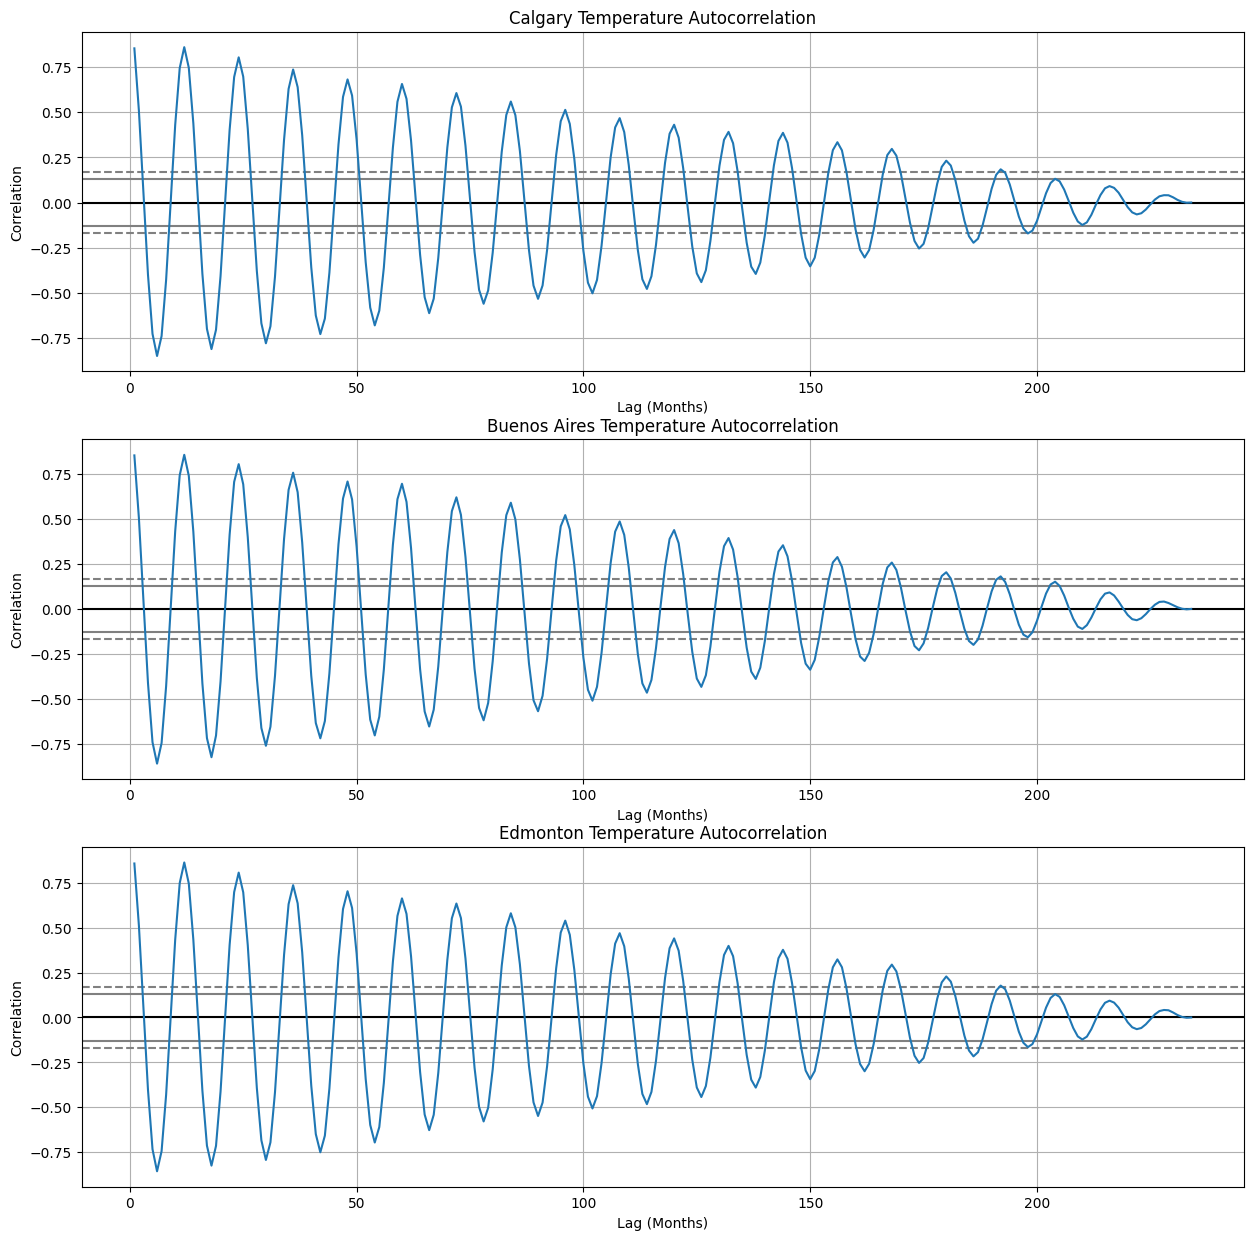

In [ ]:
# Plot auto-correlation of the monthly smoothed temperature of cities in different subplots
# Hint: use pd.plotting.autocorrelation_plot()

fig, ax = plt.subplots(3, 1, figsize = (15,15))

pd.plotting.autocorrelation_plot(city_1_monthly['AvgTemperature'], ax=ax[0])
ax[0].set_title(f"{city_1} Temperature Autocorrelation")
ax[0].set_xlabel("Lag (Months)")
ax[0].set_ylabel("Correlation")

pd.plotting.autocorrelation_plot(city_2_monthly['AvgTemperature'], ax=ax[1])
ax[1].set_title(f"{city_2} Temperature Autocorrelation")
ax[1].set_xlabel("Lag (Months)")
ax[1].set_ylabel("Correlation")

pd.plotting.autocorrelation_plot(city_3_monthly['AvgTemperature'], ax=ax[2])
ax[2].set_title(f"{city_3} Temperature Autocorrelation")
ax[2].set_xlabel("Lag (Months)")
ax[2].set_ylabel("Correlation")

**Enter answer here:** Yes, there are clear seasonal patterns in temperature. The decreasing magnitude of peaks suggests a trend, possibly climate change.

Text(0, 0.5, 'Correlation')

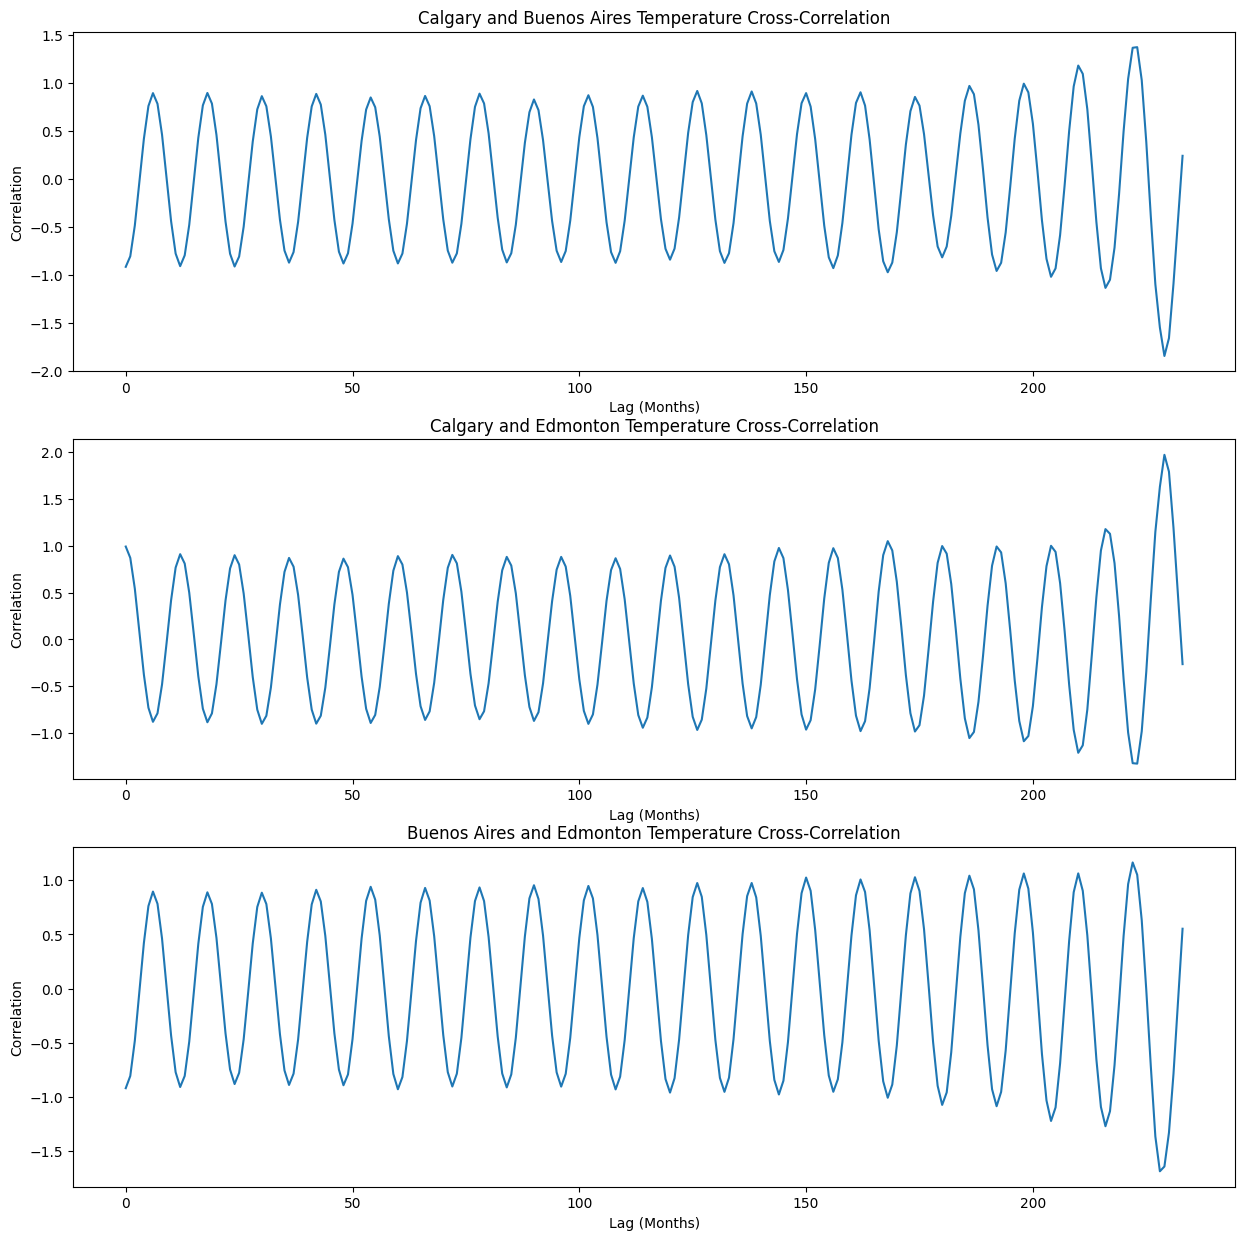

In [ ]:
# Plot cross-correlation between city pairs (Calgary and Buenos Aires, Calgary and Edmonton, Buenos Aires and Edmonton)
# Hint: use ccf() function from statsmodels.tsa.stattools

fig, ax = plt.subplots(3, 1, figsize=(15,15))

ccf_12 = ccf(city_1_monthly['AvgTemperature'], city_2_monthly['AvgTemperature'])
ccf_13 = ccf(city_1_monthly['AvgTemperature'], city_3_monthly['AvgTemperature'])
ccf_23 = ccf(city_2_monthly['AvgTemperature'], city_3_monthly['AvgTemperature'])

ax[0].plot(ccf_12)
ax[0].set_title(f"{city_1} and {city_2} Temperature Cross-Correlation")
ax[0].set_xlabel("Lag (Months)")
ax[0].set_ylabel("Correlation")

ax[1].plot(ccf_13)
ax[1].set_title(f"{city_1} and {city_3} Temperature Cross-Correlation")
ax[1].set_xlabel("Lag (Months)")
ax[1].set_ylabel("Correlation")

ax[2].plot(ccf_23)
ax[2].set_title(f"{city_2} and {city_3} Temperature Cross-Correlation")
ax[2].set_xlabel("Lag (Months)")
ax[2].set_ylabel("Correlation")

**Enter answer here:** Winter, and Summer respectively.